In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
united = Table.read_table(path_data + 'united_summer2015.csv')

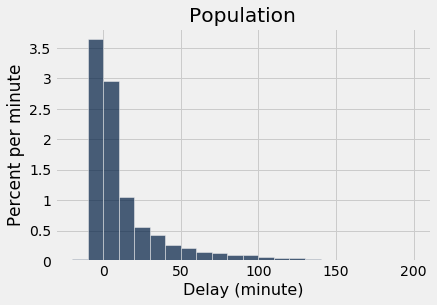

In [3]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population');

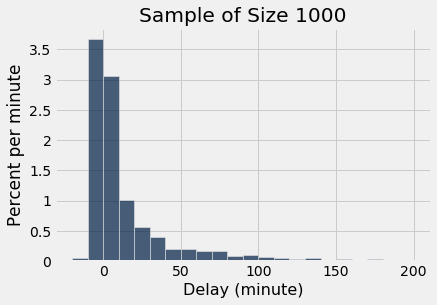

In [4]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

In [5]:
np.median(united.column('Delay'))

2.0

In [6]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [7]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [8]:
np.median(sample_1000.column('Delay'))

2.0

In [9]:
np.median(united.sample(1000).column('Delay'))

3.0

In [10]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [11]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [12]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
3
1
3
2
2.5
3
3
3
2
... (4990 rows omitted)

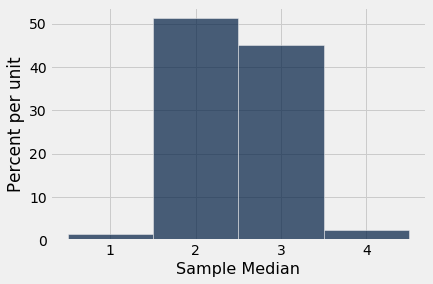

In [13]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))